<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/C%C3%B3pia_de_exercicio_2__Desenvolvimento_regional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercicio 2 - Desenvolvimento Regional
### Bárbara Junqueira dos Santos
### Modelo de Von Thünen completo – com gráficos e círculos concêntricos
### link colab: https://colab.research.google.com/drive/1fArDoPv29yI5jwrlFS35AgO2v_d0VrFL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1️⃣ Dados iniciais
# ==========================
bens = {
    1: {'a': 10, 't': 2, 'q': 10, 'k': 10},
    2: {'a': 8,  't': 1, 'q': 10, 'k': 4},
    3: {'a': 4,  't': 0.4, 'q': 10, 'k': 4}  # bem 3 adicionado
}

# ==========================
# 2️⃣ Funções do modelo
# ==========================
def renda_liquida(a, t, q, k, d):
    """Renda líquida (por hectare) em função da distância"""
    return a*q - (t*q*d + k)

def limite_cultivo(a, t, q, k):
    """Distância máxima economicamente viável (renda = 0)"""
    return (a*q - k) / (t*q)

In [ ]:
# 3️⃣ Cálculo dos gradientes de renda
# ==========================
d = np.linspace(0, 20, 300)  # distância ao mercado
rendas = {}
limites = {}

for i, p in bens.items():
    rendas[i] = renda_liquida(**p, d=d)
    limites[i] = limite_cultivo(**p)


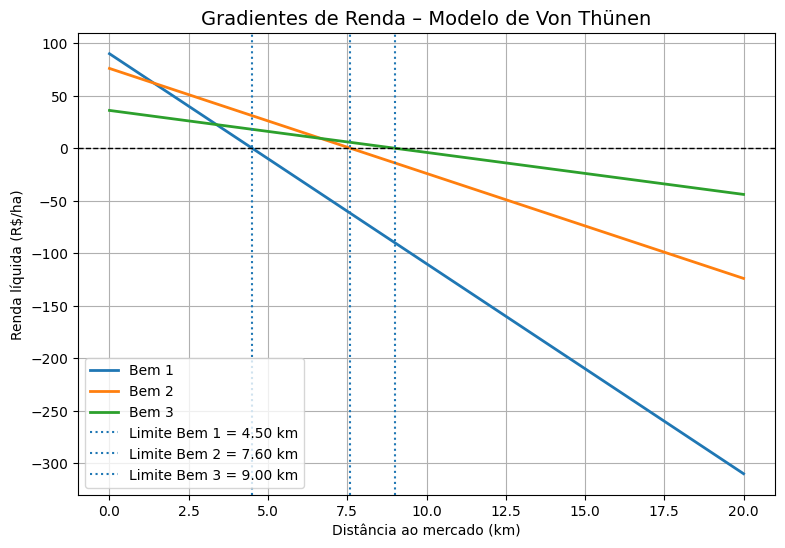

➡️ Limite do Bem 1: 4.50 km
➡️ Limite do Bem 2: 7.60 km
➡️ Limite do Bem 3: 9.00 km


In [ ]:
# 4️⃣ Gráfico dos gradientes de renda
# ==========================
plt.figure(figsize=(9,6))
for i, r in rendas.items():
    plt.plot(d, r, linewidth=2, label=f'Bem {i}')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
for i, L in limites.items():
    plt.axvline(L, linestyle=':', label=f'Limite Bem {i} = {L:.2f} km')

plt.title('Gradientes de Renda – Modelo de Von Thünen', fontsize=14)
plt.xlabel('Distância ao mercado (km)')
plt.ylabel('Renda líquida (R$/ha)')
plt.legend()
plt.grid(True)
plt.show()

# Exibir os limites
for i, L in limites.items():
    print(f"➡️ Limite do Bem {i}: {L:.2f} km")

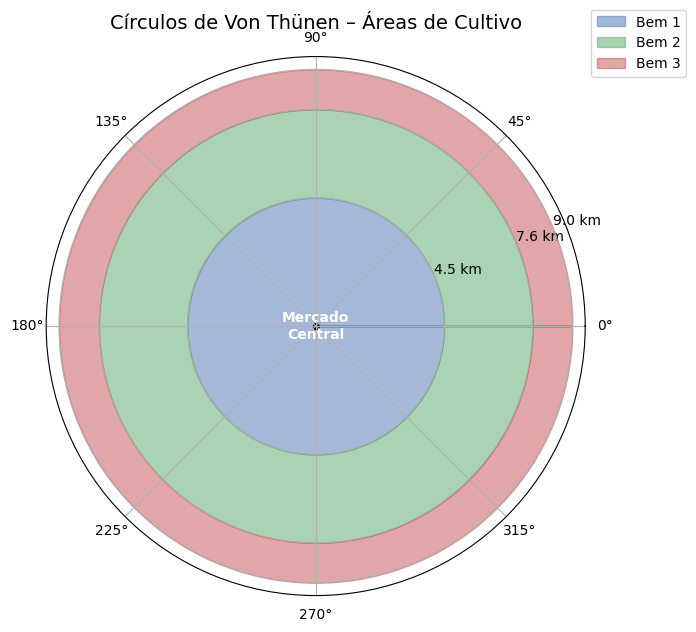


📊 INTERPRETAÇÃO DOS RESULTADOS:
- Bem 1: Cultivado mais próximo ao mercado (maior preço e custo de transporte).
- Bem 2: Ocupa a faixa intermediária (custos e preços moderados).
- Bem 3: Cultivado mais distante, com menor preço e custo de transporte.
➡️ Os círculos representam o zoneamento agrícola conforme o modelo de Von Thünen.


In [ ]:
# 5️⃣ Gráfico radial (Círculos de Von Thünen)
# ==========================
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection': 'polar'})

# Converter distâncias em radianos
theta = np.linspace(0, 2*np.pi, 500)

# Cores dos bens
cores = ['#4C72B0', '#55A868', '#C44E52']

# Plotar os círculos
raios = [limites[1], limites[2], limites[3]]

for i, raio in enumerate(raios):
    ax.fill_between(theta, 0 if i == 0 else raios[i-1], raio, color=cores[i], alpha=0.5, label=f'Bem {i+1}')

# Mercado central
ax.fill_between(theta, 0, 0.1, color='black')
ax.text(0, 0, 'Mercado\nCentral', ha='center', va='center', color='white', fontsize=10, weight='bold')

ax.set_rticks([r for r in raios])
ax.set_yticklabels([f"{r:.1f} km" for r in raios])
ax.set_title('Círculos de Von Thünen – Áreas de Cultivo', fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

# ==========================
# 6️⃣ Interpretação
# ==========================
print("\n📊 INTERPRETAÇÃO DOS RESULTADOS:")
print("- Bem 1: Cultivado mais próximo ao mercado (maior preço e custo de transporte).")
print("- Bem 2: Ocupa a faixa intermediária (custos e preços moderados).")
print("- Bem 3: Cultivado mais distante, com menor preço e custo de transporte.")
print("➡️ Os círculos representam o zoneamento agrícola conforme o modelo de Von Thünen.")